This page is for the Random Forest analysis

1. add descriptions of the data clean up; 
1. convert text fields into numeric 0/1 fields
1. drop the text fields after adding the 0/1 equivelents


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
# create a title column, then get_dummies
def get_title(col):
    name = col[0]
    if "Miss" in name:
        return "Miss"
    elif "Master" in name:
        return "Master"
    elif "Mrs" in name:
        return "Mrs"
    elif "Mr" in name:
        return "Mr"

In [9]:
title_string = pd.get_dummies(train[['Name']].apply(get_title,axis=1))

In [10]:
title_string.head()

,Master,Miss,Mr,Mrs
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0


In [11]:
def ticket_letters(col):
    Ticket = col[0]
    TicketList = Ticket.split(' ')
    if len(TicketList) > 1:
        return TicketList[0].replace('.','').replace('/','')
    else:
        return ''

In [12]:
ticket_string = pd.get_dummies(train[['Ticket']].apply(ticket_letters,axis=1))

In [13]:
ticket_string.head()

,,A4,A5,AS,C,CA,CASOTON,FC,FCC,Fa,...,SOP,SOPP,SOTONO2,SOTONOQ,SP,STONO,STONO2,SWPP,WC,WEP
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [15]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


now we add the engineered fields and drop the text fields.

In [18]:
train = pd.concat([train,sex,embark,title_string],axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,1,0


In [20]:
#train.dropna(inplace=True)
train.drop(['Sex', 'Embarked','Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Master,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0


X is all the input data; y is what we are trying to predict:

In [22]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [23]:
from sklearn.cross_validation import train_test_split

/Users/laurencommons/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
from sklearn import tree

In [26]:
dtc = tree.DecisionTreeClassifier()

In [29]:
dtc = dtc.fit(X_train,y_train)

In [30]:
predictions = dtc.predict(X_test)

In [1]:
#predictions = logmodel.predict(X_test)

In [31]:
predictions

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1])

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print()
print('Classification Report')
print(classification_report(y_test,predictions))


Confusion Matrix
[[142  27]
 [ 42  84]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       169
          1       0.76      0.67      0.71       126

avg / total       0.77      0.77      0.76       295



### For comparison, the results of the Logistic Regression analysis:
    Confusion Matrix
    [[153  16]
     [ 37  89]]

    Classification Report
                  precision    recall  f1-score   support

              0       0.81      0.91      0.85       169
              1       0.85      0.71      0.77       126

    avg / total       0.82      0.82      0.82       295




# Now lets try a Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=50)

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
predictions = rfc.predict(X_test)

In [97]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0])

In [98]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print()
print('Classification Report')
print(classification_report(y_test,predictions))


Confusion Matrix
[[149  20]
 [ 36  90]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       169
          1       0.82      0.71      0.76       126

avg / total       0.81      0.81      0.81       295



## Lets look at which variables are most important to the classifier.
First, we will create a Pandas dataframe with the column names and the feature_importances variable of the classifier.

In [109]:
features = pd.Series(rfc.feature_importances_,X.columns).sort_values(ascending=False)

In [110]:
features

Fare      0.239909
Age       0.223899
male      0.117970
Mr        0.113429
Pclass    0.080350
SibSp     0.057910
Mrs       0.041736
Miss      0.039237
Parch     0.036250
S         0.026366
Q         0.012330
Master    0.010615
dtype: float64

Text(0.5,1,'Visualization of Relative Feature Importance')

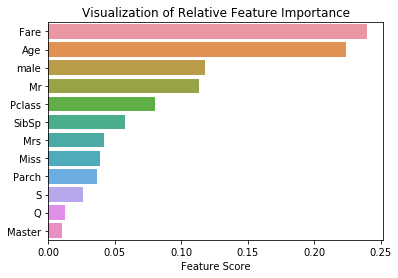

In [119]:
sns.barplot(x=features, y=features.index)
plt.xlabel('Feature Score')
plt.title('Visualization of Relative Feature Importance')

Text(0.5,1,'Relative Feature Importance')

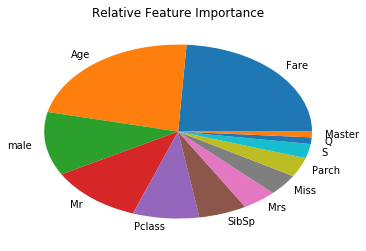

In [122]:
plt.pie(features,labels=features.index)
plt.title('Relative Feature Importance')